In [4]:
import pandas as pd

# File Path
file_path = r"D:\Masters Study Abroad\BA 2nd Sem\IS6611 Applied Research in Business Analytics\IS6611 IT Artefact V3\Datasets\US Stocks\NASDAQ_Combined_Dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by Date (just in case)
df = df.sort_values(by='Date')

# Set 'Date' as index (optional, useful for time series analysis)
df.set_index('Date', inplace=True)

# Show basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-06-30 to 2025-06-30
Columns: 500 entries, AAPL_Close/Last to ZS_Low
dtypes: float64(100), object(400)
memory usage: 9.6+ MB
None
           AAPL_Close/Last  AAPL_Volume AAPL_Open AAPL_High  AAPL_Low  \
Date                                                                    
2015-06-30        $31.3562  177304200.0  $31.3925    $31.53   $31.215   
2015-07-01          $31.65  120827560.0   $31.725   $31.735  $31.4975   
2015-07-02          $31.61  108684720.0  $31.6075  $31.6725  $31.4425   
2015-07-06          $31.50  111891800.0   $31.235  $31.5575  $31.2125   
2015-07-07        $31.4225  186948360.0  $31.4725  $31.5375  $30.9425   

           Abnb_Close/Last  Abnb_Volume Abnb_Open Abnb_High Abnb_Low  ...  \
Date                                                                  ...   
2015-06-30             NaN          NaN       NaN       NaN      NaN  ...   
2015-07-01             NaN          NaN       NaN       

C:\Users\shamg\AppData\Local\Temp\ipykernel_32088\714835007.py:7: DtypeWarning: Columns (66,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
# Drop Open, High, Low columns (not needed)
cols_to_drop = [col for col in df.columns if '_Open' in col or '_High' in col or '_Low' in col]
df.drop(columns=cols_to_drop, inplace=True)

# Confirm new shape and remaining columns
print(f"Dataset shape after dropping: {df.shape}")
print("Sample columns:", df.columns[:10].tolist())


Dataset shape after dropping: (2515, 200)
Sample columns: ['AAPL_Close/Last', 'AAPL_Volume', 'Abnb_Close/Last', 'Abnb_Volume', 'adbe_Close/Last', 'adbe_Volume', 'adi_Close/Last', 'adi_Volume', 'adp_Close/Last', 'adp_Volume']


In [6]:
# Identify Close and Volume columns
close_cols = [col for col in df.columns if '_Close/Last' in col]
volume_cols = [col for col in df.columns if '_Volume' in col]

# Function to clean and convert dollar-formatted strings to float
def clean_dollar_column(col):
    return col.replace(r'[\$,]', '', regex=True).astype(float)

# Clean Close/Last columns
df[close_cols] = df[close_cols].apply(clean_dollar_column)

# Ensure Volume columns are also float (in case of string or mixed types)
df[volume_cols] = df[volume_cols].apply(pd.to_numeric, errors='coerce')

# Confirm cleanup worked
print(df[close_cols[:3] + volume_cols[:3]].head())

            AAPL_Close/Last  Abnb_Close/Last  adbe_Close/Last  AAPL_Volume  \
Date                                                                         
2015-06-30          31.3562              NaN              NaN  177304200.0   
2015-07-01          31.6500              NaN           80.945  120827560.0   
2015-07-02          31.6100              NaN           80.750  108684720.0   
2015-07-06          31.5000              NaN           80.500  111891800.0   
2015-07-07          31.4225              NaN           80.590  186948360.0   

            Abnb_Volume  adbe_Volume  
Date                                  
2015-06-30          NaN          NaN  
2015-07-01          NaN    2944493.0  
2015-07-02          NaN    2200892.0  
2015-07-06          NaN    2590913.0  
2015-07-07          NaN    2781935.0  


In [12]:
import numpy as np

cagr_results = []

# Loop through all Close/Last columns
for col in close_cols:
    stock_series = df[col].dropna()
    
    # Skip if not enough data
    if stock_series.shape[0] < 2:
        continue

    start_price = stock_series.iloc[0]
    end_price = stock_series.iloc[-1]
    start_date = stock_series.index[0]
    end_date = stock_series.index[-1]
    
    # Calculate the number of years between start and end
    years = (end_date - start_date).days / 365.25

    if start_price > 0 and years > 0:
        cagr = (end_price / start_price) ** (1 / years) - 1
        cagr_results.append({
            'Stock': col.replace('_Close/Last', ''),
            'CAGR': cagr,
            'Start Date': start_date.date(),
            'End Date': end_date.date()
        })

# Convert to DataFrame
cagr_df = pd.DataFrame(cagr_results)

# Add a percentage column to make interpretation easier
cagr_df['CAGR (%)'] = cagr_df['CAGR'] * 100

# Repeat the sort with new column
cagr_df_sorted = cagr_df.sort_values(by='CAGR', ascending=False)

# Refresh top/bottom
top_5 = cagr_df_sorted.head(5).reset_index(drop=True)
bottom_5 = cagr_df_sorted.tail(5).reset_index(drop=True)

# Display again
print("Top 5 Performing Stocks by CAGR (%):\n")
print(top_5[['Stock', 'CAGR (%)', 'Start Date', 'End Date']])

print("\nBottom 5 Performing Stocks by CAGR (%):\n")
print(bottom_5[['Stock', 'CAGR (%)', 'Start Date', 'End Date']])


Top 5 Performing Stocks by CAGR (%):

  Stock   CAGR (%)  Start Date    End Date
0   ceg  80.605866  2022-01-19  2025-06-27
1  NVDA  77.757694  2015-06-30  2025-06-27
2  PLTR  73.887526  2020-09-30  2025-06-27
3   arm  70.865017  2023-09-14  2025-06-27
4   amd  50.618922  2015-06-30  2025-06-27

Bottom 5 Performing Stocks by CAGR (%):

  Stock   CAGR (%)  Start Date    End Date
0  INTC  -2.889553  2015-06-30  2025-06-27
1   gfs  -5.021300  2021-10-28  2025-06-27
2   KHC  -9.961880  2015-07-06  2025-06-27
3   WBD -10.239863  2015-06-30  2025-06-27
4  biib -10.410625  2015-06-30  2025-06-27


# Forecasting

C:\Users\shamg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


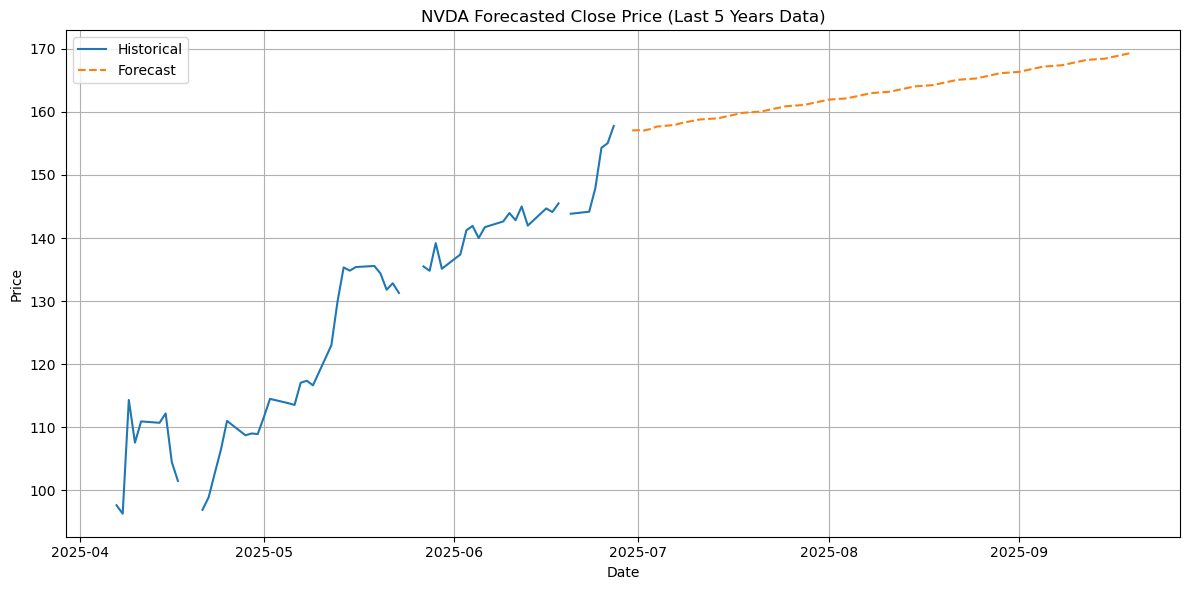

In [40]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import pandas as pd

stock = 'NVDA'  # change in loop if automating

# Step 1: Extract Close and Volume, drop NaNs
ts_stock = df[[f'{stock}_Close/Last', f'{stock}_Volume']].dropna()

# Step 2: Filter last 5 years (if available)
end_date = ts_stock.index.max()
start_cutoff = end_date - pd.DateOffset(years=3)
ts_stock = ts_stock.loc[ts_stock.index >= start_cutoff]

# Step 3: Set frequency (to fix warning)
ts_stock = ts_stock.asfreq('B')

# Step 4: Differencing
ts_stock_diff = ts_stock.diff().dropna()

# Step 5: Fit VAR
model = VAR(ts_stock_diff)
lag_order = model.select_order(15).aic
fitted_model = model.fit(lag_order)

# Step 6: Forecast
forecast_steps = 60
forecast_input = ts_stock_diff.values[-lag_order:]
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=ts_stock_diff.columns)

# Step 7: Invert differencing
last_known = ts_stock.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_restored = forecast_cumsum.add(last_known)

# Step 8: Assign forecast index
forecast_dates = pd.date_range(start=ts_stock.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_restored.index = forecast_dates

# Step 9: Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_stock[f'{stock}_Close/Last'][-60:], label='Historical')
plt.plot(forecast_restored[f'{stock}_Close/Last'], label='Forecast', linestyle='--')
plt.title(f"{stock} Forecasted Close Price (Last 5 Years Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jul, 2025
Time:                     14:38:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    39.5399
Nobs:                     716.000    HQIC:                   39.4379
Log likelihood:          -16101.7    FPE:                1.25844e+17
AIC:                      39.3738    Det(Omega_mle):     1.21396e+17
--------------------------------------------------------------------
Results for equation NVDA_Close/Last
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.240041         0.107809            2.227           0.026
L1.NVDA_Close/Last        -0.107814         0.037784           -2.853           0.004
L1.NVDA_Volume             0.0

In [42]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(fitted_model.resid)
for col, val in zip(ts_stock_diff.columns, dw):
    print(f"{col}: Durbin-Watson = {val:.2f}")


NVDA_Close/Last: Durbin-Watson = 2.00
NVDA_Volume: Durbin-Watson = 2.00


In [43]:
print(fitted_model.is_stable(verbose=True))

Eigenvalues of VAR(1) rep
0.726123350921942
0.726123350921942
0.6910229528692511
0.6910229528692511
0.5638623582950669
0.5030552642361056
0.5030552642361056
0.7060529744700976
0.7060529744700976
0.5608353237098357
0.5608353237098357
0.49669887952946823
True


C:\Users\shamg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


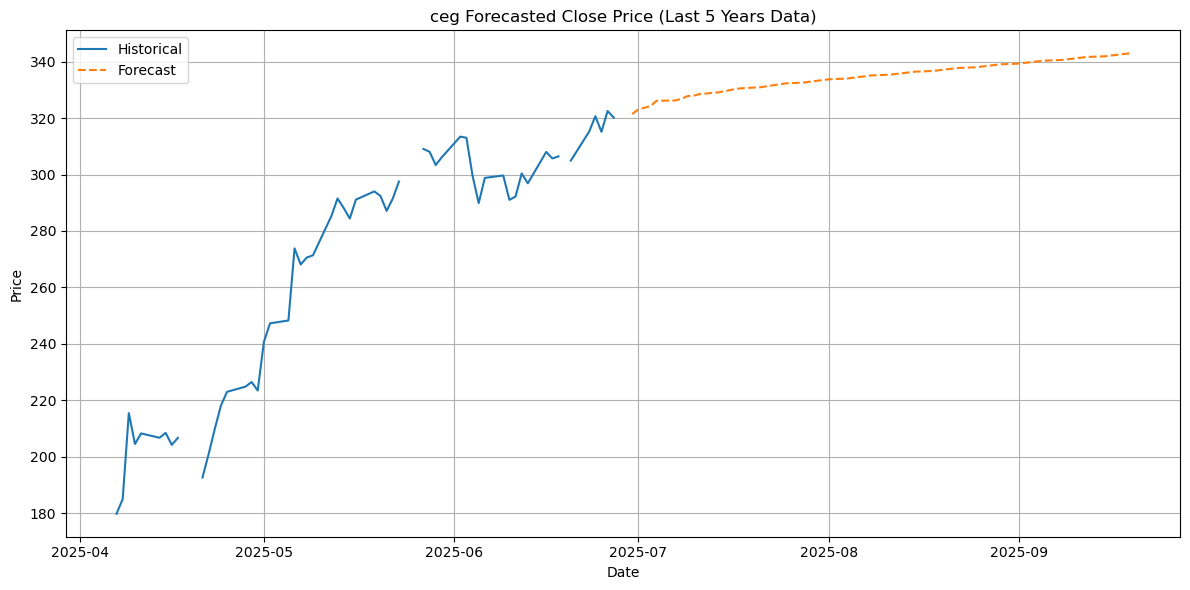

In [39]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import pandas as pd

stock = 'ceg'  # change in loop if automating

# Step 1: Extract Close and Volume, drop NaNs
ts_stock = df[[f'{stock}_Close/Last', f'{stock}_Volume']].dropna()

# Step 2: Filter last 5 years (if available)
end_date = ts_stock.index.max()
start_cutoff = end_date - pd.DateOffset(years=5)
ts_stock = ts_stock.loc[ts_stock.index >= start_cutoff]

# Step 3: Set frequency (to fix warning)
ts_stock = ts_stock.asfreq('B')

# Step 4: Differencing
ts_stock_diff = ts_stock.diff().dropna()

# Step 5: Fit VAR
model = VAR(ts_stock_diff)
lag_order = model.select_order(15).aic
fitted_model = model.fit(lag_order)

# Step 6: Forecast
forecast_steps = 60
forecast_input = ts_stock_diff.values[-lag_order:]
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=ts_stock_diff.columns)

# Step 7: Invert differencing
last_known = ts_stock.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_restored = forecast_cumsum.add(last_known)

# Step 8: Assign forecast index
forecast_dates = pd.date_range(start=ts_stock.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_restored.index = forecast_dates

# Step 9: Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_stock[f'{stock}_Close/Last'][-60:], label='Historical')
plt.plot(forecast_restored[f'{stock}_Close/Last'], label='Forecast', linestyle='--')
plt.title(f"{stock} Forecasted Close Price (Last 5 Years Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\shamg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


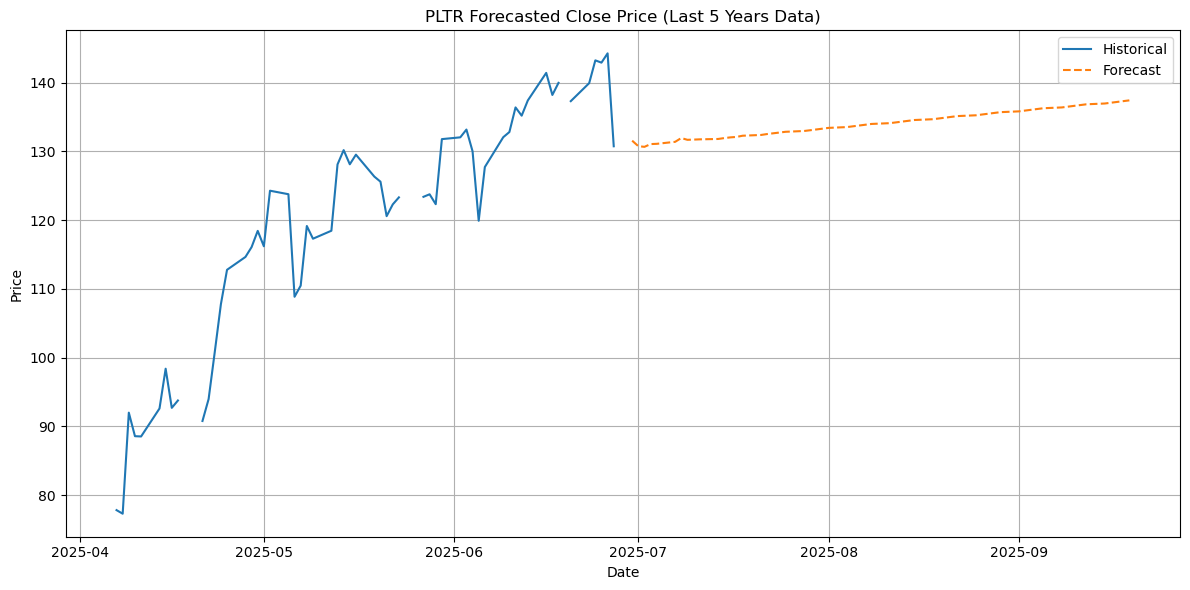

In [31]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import pandas as pd

stock = 'PLTR'  # change in loop if automating

# Step 1: Extract Close and Volume, drop NaNs
ts_stock = df[[f'{stock}_Close/Last', f'{stock}_Volume']].dropna()

# Step 2: Filter last 5 years (if available)
end_date = ts_stock.index.max()
start_cutoff = end_date - pd.DateOffset(years=5)
ts_stock = ts_stock.loc[ts_stock.index >= start_cutoff]

# Step 3: Set frequency (to fix warning)
ts_stock = ts_stock.asfreq('B')

# Step 4: Differencing
ts_stock_diff = ts_stock.diff().dropna()

# Step 5: Fit VAR
model = VAR(ts_stock_diff)
lag_order = model.select_order(15).aic
fitted_model = model.fit(lag_order)

# Step 6: Forecast
forecast_steps = 60
forecast_input = ts_stock_diff.values[-lag_order:]
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=ts_stock_diff.columns)

# Step 7: Invert differencing
last_known = ts_stock.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_restored = forecast_cumsum.add(last_known)

# Step 8: Assign forecast index
forecast_dates = pd.date_range(start=ts_stock.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_restored.index = forecast_dates

# Step 9: Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_stock[f'{stock}_Close/Last'][-60:], label='Historical')
plt.plot(forecast_restored[f'{stock}_Close/Last'], label='Forecast', linestyle='--')
plt.title(f"{stock} Forecasted Close Price (Last 5 Years Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\shamg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


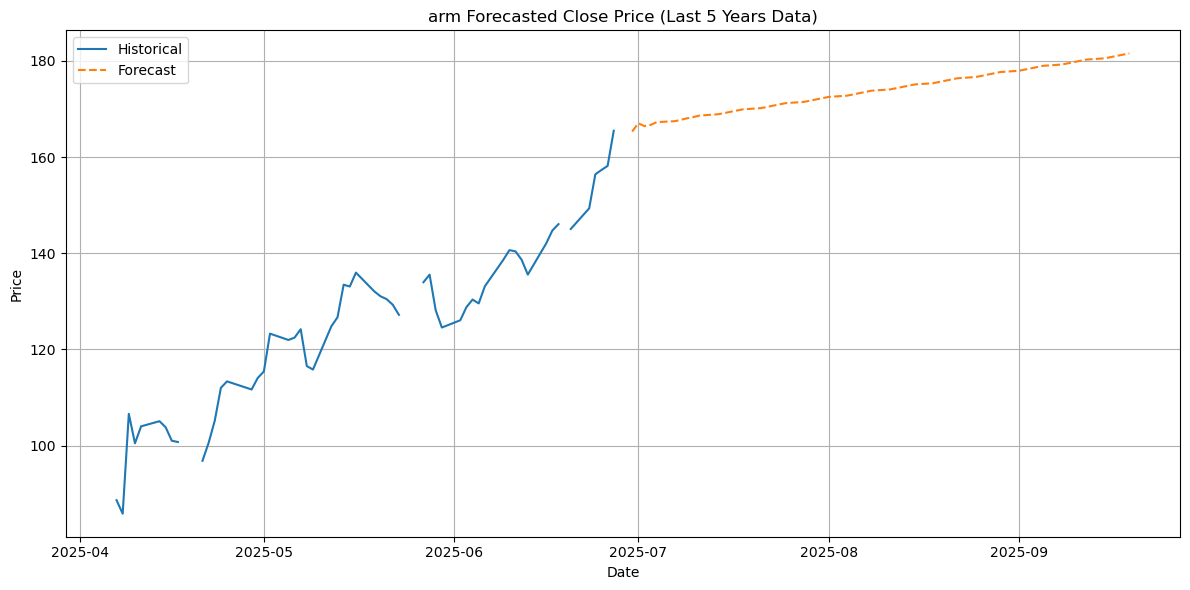

In [32]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import pandas as pd

stock = 'arm'  # change in loop if automating

# Step 1: Extract Close and Volume, drop NaNs
ts_stock = df[[f'{stock}_Close/Last', f'{stock}_Volume']].dropna()

# Step 2: Filter last 5 years (if available)
end_date = ts_stock.index.max()
start_cutoff = end_date - pd.DateOffset(years=5)
ts_stock = ts_stock.loc[ts_stock.index >= start_cutoff]

# Step 3: Set frequency (to fix warning)
ts_stock = ts_stock.asfreq('B')

# Step 4: Differencing
ts_stock_diff = ts_stock.diff().dropna()

# Step 5: Fit VAR
model = VAR(ts_stock_diff)
lag_order = model.select_order(15).aic
fitted_model = model.fit(lag_order)

# Step 6: Forecast
forecast_steps = 60
forecast_input = ts_stock_diff.values[-lag_order:]
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=ts_stock_diff.columns)

# Step 7: Invert differencing
last_known = ts_stock.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_restored = forecast_cumsum.add(last_known)

# Step 8: Assign forecast index
forecast_dates = pd.date_range(start=ts_stock.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_restored.index = forecast_dates

# Step 9: Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_stock[f'{stock}_Close/Last'][-60:], label='Historical')
plt.plot(forecast_restored[f'{stock}_Close/Last'], label='Forecast', linestyle='--')
plt.title(f"{stock} Forecasted Close Price (Last 5 Years Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\shamg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


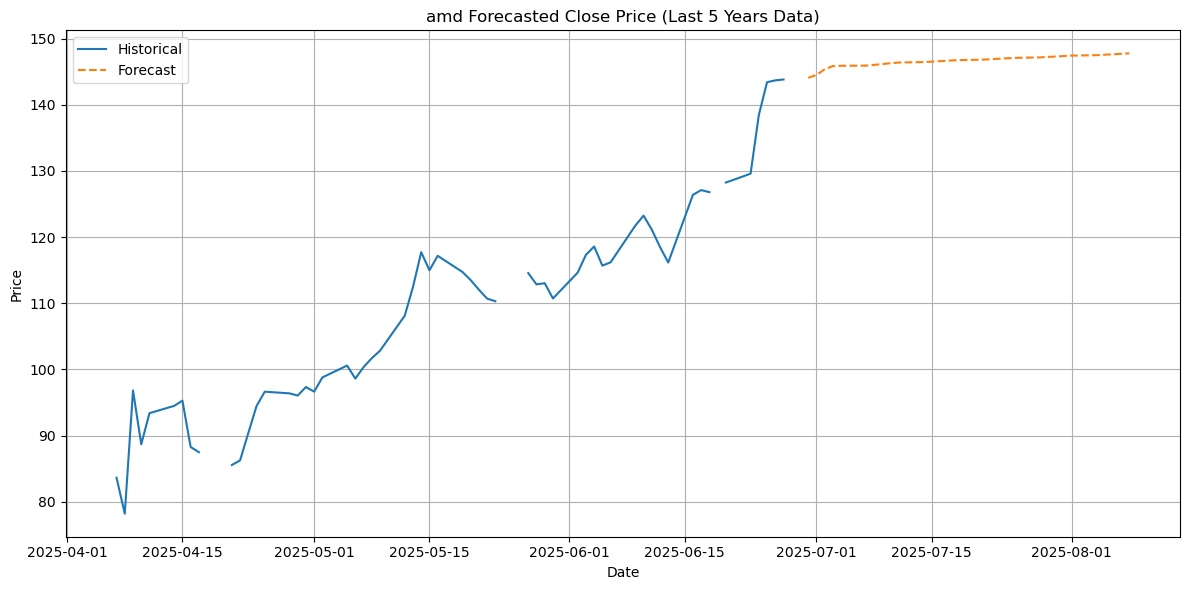

In [26]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import pandas as pd

stock = 'amd'  # change in loop if automating

# Step 1: Extract Close and Volume, drop NaNs
ts_stock = df[[f'{stock}_Close/Last', f'{stock}_Volume']].dropna()

# Step 2: Filter last 5 years (if available)
end_date = ts_stock.index.max()
start_cutoff = end_date - pd.DateOffset(years=5)
ts_stock = ts_stock.loc[ts_stock.index >= start_cutoff]

# Step 3: Set frequency (to fix warning)
ts_stock = ts_stock.asfreq('B')

# Step 4: Differencing
ts_stock_diff = ts_stock.diff().dropna()

# Step 5: Fit VAR
model = VAR(ts_stock_diff)
lag_order = model.select_order(15).aic
fitted_model = model.fit(lag_order)

# Step 6: Forecast
forecast_steps = 30
forecast_input = ts_stock_diff.values[-lag_order:]
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=ts_stock_diff.columns)

# Step 7: Invert differencing
last_known = ts_stock.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_restored = forecast_cumsum.add(last_known)

# Step 8: Assign forecast index
forecast_dates = pd.date_range(start=ts_stock.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_restored.index = forecast_dates

# Step 9: Plot
plt.figure(figsize=(12, 6))
plt.plot(ts_stock[f'{stock}_Close/Last'][-60:], label='Historical')
plt.plot(forecast_restored[f'{stock}_Close/Last'], label='Forecast', linestyle='--')
plt.title(f"{stock} Forecasted Close Price (Last 5 Years Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

top_5_stocks = ['ceg', 'NVDA', 'PLTR', 'arm', 'amd']
forecast_steps = 365
combined_forecasts = []

for stock in top_5_stocks:
    # Prepare the stock's data
    ts_stock = df[[f'{stock}_Close/Last', f'{stock}_Volume']].dropna()
    
    # Restrict to last 3 years
    end_date = ts_stock.index.max()
    start_cutoff = end_date - pd.DateOffset(years=3)
    ts_stock = ts_stock.loc[ts_stock.index >= start_cutoff]
    ts_stock.index = pd.date_range(start=ts_stock.index[0], periods=len(ts_stock), freq='B')
    
    # Differencing
    ts_stock_diff = ts_stock.diff().dropna()

    # Fit VAR
    model = VAR(ts_stock_diff)
    lag_order = model.select_order(15).aic
    fitted_model = model.fit(lag_order)

    # Forecast
    forecast_input = ts_stock_diff.values[-lag_order:]
    forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)
    forecast_df = pd.DataFrame(forecast, columns=ts_stock_diff.columns)

    # Invert differencing
    last_known = ts_stock.iloc[-1]
    forecast_cumsum = forecast_df.cumsum()
    forecast_restored = forecast_cumsum.add(last_known)

    # Assign forecast index
    forecast_dates = pd.date_range(start=ts_stock.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
    forecast_restored.index = forecast_dates

    # Rename columns to avoid collision
    forecast_restored = forecast_restored.rename(columns={
        f'{stock}_Close/Last': f'{stock}_Forecast_Close',
        f'{stock}_Volume': f'{stock}_Forecast_Volume'
    })

    # Append to list
    combined_forecasts.append(forecast_restored[[f'{stock}_Forecast_Close', f'{stock}_Forecast_Volume']])


In [48]:
# Merge all forecasts on index (date)
final_forecast_df = pd.concat(combined_forecasts, axis=1)

# Save to CSV
final_forecast_df.to_csv(r"D:\Masters Study Abroad\BA 2nd Sem\IS6611 Applied Research in Business Analytics\IS6611 IT Artefact V3\Datasets\US Stocks\1year_top_5_stock_VAR_forecast.csv")

print("✅ Forecast dataset saved as 'top_5_stock_VAR_forecast.csv'")


✅ Forecast dataset saved as 'top_5_stock_VAR_forecast.csv'
